In [1]:
using DynamicalSystems
using DifferentialEquations
using OrdinaryDiffEq
using BenchmarkTools

using SciPy
using Statistics
using StaticArrays
using PyPlot

In [2]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k1, k2, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [3]:
function CALCPDF(spikes)
    
    ϵ = 0.9
    ee_counter = [sum(i->s<=i<s+ϵ, spikes) for s in range(1, 4,100000)]
    pdf = ee_counter ./ length(spikes)
    return range(1, 4,100000), pdf
    
end

CALCPDF (generic function with 1 method)

In [4]:
tspan = (0., 100000.)

a = 1.
b = 3.
c = 1.
d = 5.
xr = -1.6
r = 0.01 # 0.01
s = 5.
I = 4.
xv = 2.

k1= -0.17
k2 = k1

-0.17

In [5]:
using JLD
condition_array = load("C:\\Users\\olenin.s\\Desktop\\dynamical-systems\\Hindmarrh Rose\\probablity density function\\result\\small_step_0.001\\condition_HR_array.jld")["data"]

6×1001 Matrix{Float64}:
 -1.5  -1.40416   -1.05529   -0.898304  …  -1.16079  -0.952531  -0.798957
  0.0  -8.91851   -4.76027   -3.39811      -6.02688  -3.80106   -2.60755
  0.0   3.75836    3.73025    3.7013        3.55218   3.84761    3.75601
 -2.5  -0.940059  -0.698735  -1.20362      -1.16079  -0.952531  -0.798957
  0.0  -3.37097   -1.90282   -6.09311      -6.02688  -3.80106   -2.60755
  0.0   4.117      3.82588    4.00787   …   3.55218   3.84761    3.75601

In [6]:
condition_array[:, 161]

6-element Vector{Float64}:
  -1.4717238563302228
 -10.056940695280609
   3.732553516251709
  -0.6407773683816244
  -1.1553773183798874
   4.189094473866837

In [ ]:
k = 0.0
p = SA[a, b, c, d,
        s, xr, r, I, xv, 0.07, 0.07, k]

prob = ODEProblem(HR, condition_k12, 1000000, p)
sol= solve(prob, Vern9(), abstol = 1e-11, reltol = 1e-11, maxiters = 50000000);

In [114]:
ed = int(length(sol[1,:]) / 4)

x_sum = sol[1,:][ed:end] + sol[4,:][ed:end]
    
index = signal.argrelmax( x_sum )[1]
spikes = [x_sum[x] for x in index]
    
Hs = Statistics.mean(spikes) + 6 * Statistics.std(spikes)
counts = spikes[spikes.>=Hs];
length(spikes), Hs

(4611, 4.552600176729203)

In [115]:
sel_, pdf_ = CALCPDF(spikes)

(1.0:3.000030000300003e-5:4.0, [0.15332899587941878, 0.15332899587941878, 0.15332899587941878, 0.15332899587941878, 0.15332899587941878, 0.15332899587941878, 0.15332899587941878, 0.15332899587941878, 0.15332899587941878, 0.15332899587941878  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

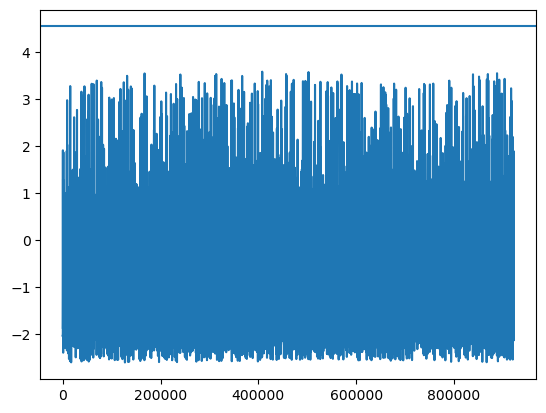

PyObject <matplotlib.lines.Line2D object at 0x00000000E9F00640>

In [116]:
plot(x_sum)
axhline(Hs)

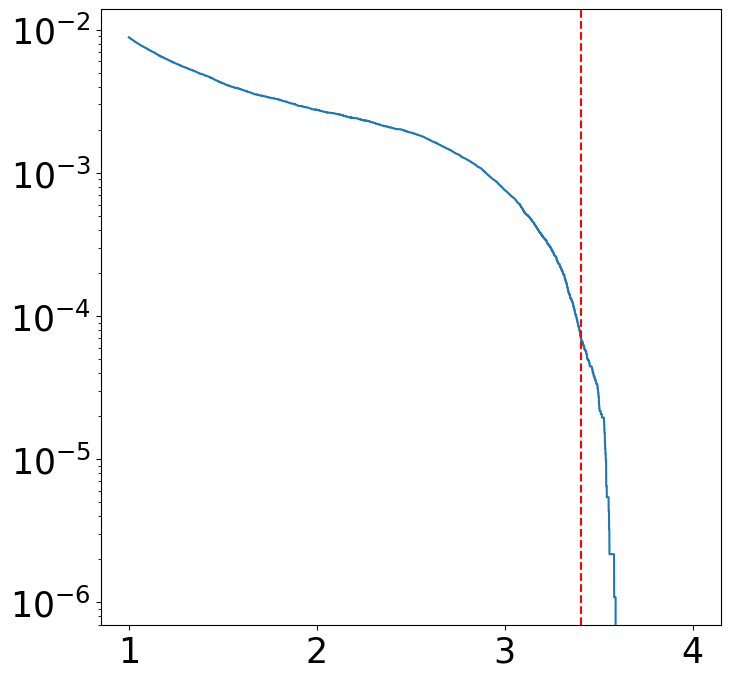

In [113]:
fig, ax = subplots(figsize = (8, 8))

ax.set_yscale("log")

ax.plot(sel_, pdf_)
ax.axvline(Hs, color ="red", linestyle ="--")
ax.tick_params(labelsize = 25)

### .....

In [7]:
condition_k12 = SA[ -1.320002284372594, -7.91292796197638, 3.6658401399649767,
                     -0.6835933588632608, -1.590459692296463, 4.012293458828297]

condition_k13 = SA[-0.8536633103424316, -2.9591950743673294, 3.796610459027077,
                    -0.9361746981397223, -3.2738524699986193, 4.196718146335791]

condition_k14 = SA[-1.2172137881600211, -5.93224540746493, 4.1782664462638435,
                    1.3611041052386312, -4.497465496834738, 3.9063362790428924]

condition_k15 = SA[-0.6642725029447882, -1.3174044004547454, 4.157916101322488,
                    -1.488172827149516, -10.00769858681602, 4.047590005144344]

condition_k16 = SA[-1.4717238563302228, -10.056940695280609, 3.732553516251709,
                    -0.6407773683816244, -1.1553773183798874, 4.189094473866837]

int(x) = floor(Int, x);

In [65]:
k = 0.12
p = SA[a, b, c, d,
        s, xr, r, I, xv, k1, k2, k]

prob = ODEProblem(HR, condition_k12, tspan, p)
sol12 = solve(prob, AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11, maxiters = 10000000);

In [72]:
ed = int(length(sol12[1,:]) / 4)

x_sum = sol12[1,:][ed:end] + sol12[4,:][ed:end]
    
# index = signal.argrelmax( x_sum )[1]
spikes = x_sum # [x_sum[x] for x in index]
    
Hs = Statistics.mean(spikes) + 6 * Statistics.std(spikes)
counts = spikes[spikes.>=Hs];
length(spikes), Hs

(1021038, 2.585677280621412)

In [70]:
sel_, pdf_ = CALCPDF(spikes)

(1.0:3.000030000300003e-5:4.0, [0.0030361259815991177, 0.0030351465861211827, 0.0030351465861211827, 0.003033187795165312, 0.003033187795165312, 0.003033187795165312, 0.003033187795165312, 0.003032208399687377, 0.0030312290042094417, 0.0030312290042094417  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

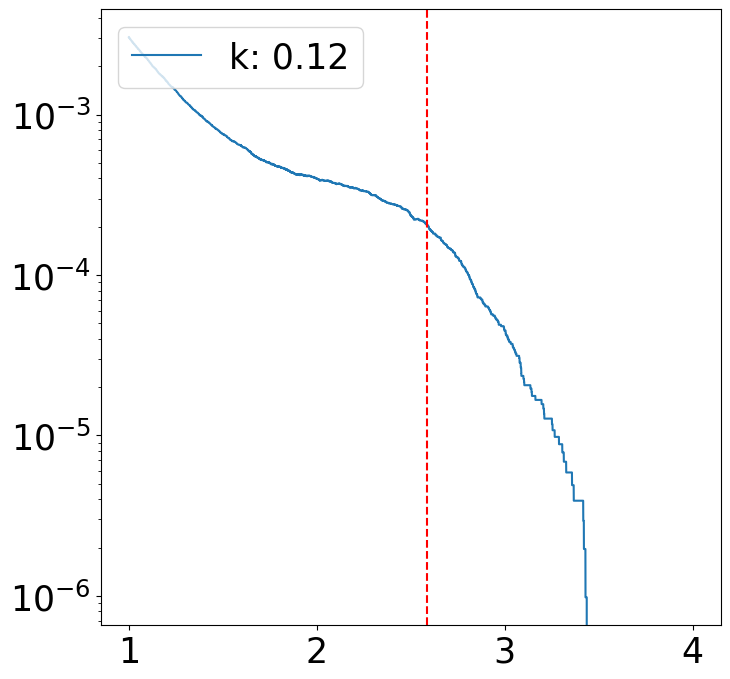

PyObject <matplotlib.legend.Legend object at 0x00000000BF552340>

In [71]:
fig, ax = subplots(figsize = (8, 8))

ax.set_yscale("log")

ax.plot(sel_, pdf_, label  = "k: 0.12")
ax.axvline(Hs, color ="red", linestyle ="--")
ax.tick_params(labelsize = 25)
ax.legend(loc="upper left", fontsize = 25)

In [74]:
k = 0.13
p = SA[a, b, c, d,
        s, xr, r, I, xv, k1, k2, k]

prob = ODEProblem(HR, condition_k13, tspan, p)
sol13 = solve(prob, AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11, maxiters = 10000000);

In [75]:
ed = int(length(sol13[1,:]) / 4)

x_sum = sol13[1,:][ed:end] + sol13[4,:][ed:end]
    
# index = signal.argrelmax( x_sum )[1]
spikes = x_sum # [x_sum[x] for x in index]
    
Hs = Statistics.mean(spikes) + 6 * Statistics.std(spikes)
counts = spikes[spikes.>=Hs];
length(spikes), Hs

(1022666, 2.7016546381953095)

In [76]:
sel_, pdf_ = CALCPDF(spikes)

(1.0:3.000030000300003e-5:4.0, [0.00317699033702108, 0.00317699033702108, 0.0031760125006600397, 0.0031760125006600397, 0.0031760125006600397, 0.003175034664298999, 0.003175034664298999, 0.0031740568279379584, 0.003172101155215877, 0.003172101155215877  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

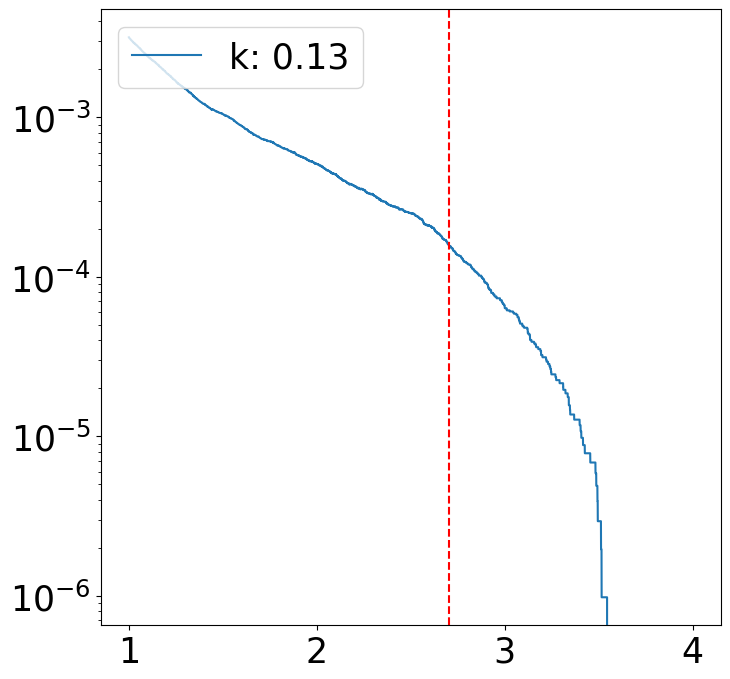

PyObject <matplotlib.legend.Legend object at 0x00000000C42CFE20>

In [78]:
fig, ax = subplots(figsize = (8, 8))

ax.set_yscale("log")

ax.plot(sel_, pdf_, label  = "k: 0.13")
ax.axvline(Hs, color ="red", linestyle ="--")
ax.tick_params(labelsize = 25)
ax.legend(loc="upper left", fontsize = 25)

In [79]:
k = 0.14
p = SA[a, b, c, d,
        s, xr, r, I, xv, k1, k2, k]

prob = ODEProblem(HR, condition_k14, tspan, p)
sol14 = solve(prob, AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11, maxiters = 10000000);

In [80]:
ed = int(length(sol14[1,:]) / 4)

x_sum = sol14[1,:][ed:end] + sol14[4,:][ed:end]
    
# index = signal.argrelmax( x_sum )[1]
spikes = x_sum # [x_sum[x] for x in index]
    
Hs = Statistics.mean(spikes) + 6 * Statistics.std(spikes)
counts = spikes[spikes.>=Hs];
length(spikes), Hs

(1023979, 2.8192250342404677)

In [81]:
sel_, pdf_ = CALCPDF(spikes)

(1.0:3.000030000300003e-5:4.0, [0.0035049546914536333, 0.0035030015263984907, 0.0035030015263984907, 0.003502024943870919, 0.003502024943870919, 0.003502024943870919, 0.0035010483613433477, 0.0035010483613433477, 0.0035010483613433477, 0.0035000717788157766  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

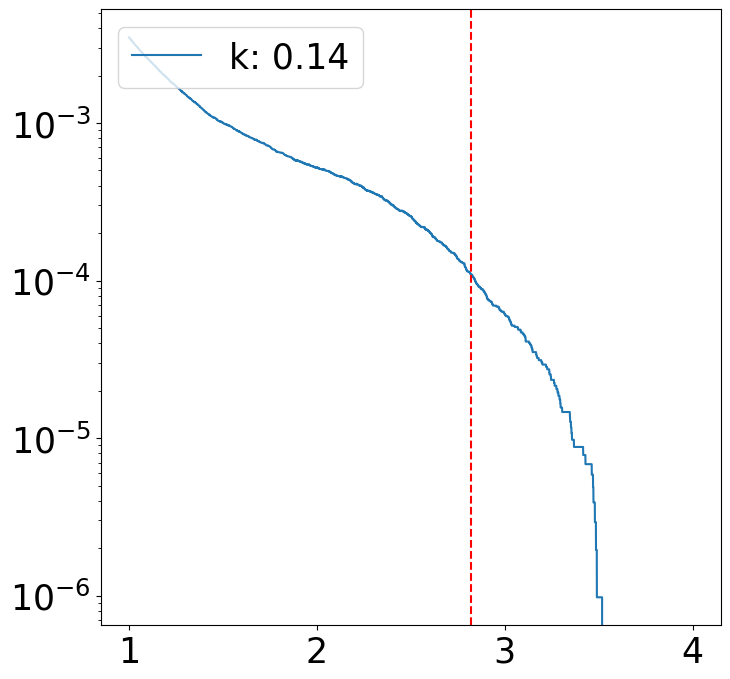

PyObject <matplotlib.legend.Legend object at 0x00000000CB862EE0>

In [82]:
fig, ax = subplots(figsize = (8, 8))

ax.set_yscale("log")

ax.plot(sel_, pdf_, label  = "k: 0.14")
ax.axvline(Hs, color ="red", linestyle ="--")
ax.tick_params(labelsize = 25)
ax.legend(loc="upper left", fontsize = 25)

In [83]:
k = 0.15
p = SA[a, b, c, d,
        s, xr, r, I, xv, k1, k2, k]

prob = ODEProblem(HR, condition_k15, tspan, p)
sol15 = solve(prob, AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11, maxiters = 10000000);

In [84]:
ed = int(length(sol15[1,:]) / 4)

x_sum = sol15[1,:][ed:end] + sol15[4,:][ed:end]
    
# index = signal.argrelmax( x_sum )[1]
spikes = x_sum # [x_sum[x] for x in index]
    
Hs = Statistics.mean(spikes) + 6 * Statistics.std(spikes)
counts = spikes[spikes.>=Hs];
length(spikes), Hs

(1034839, 2.859596905086633)

In [85]:
sel_, pdf_ = CALCPDF(spikes)

(1.0:3.000030000300003e-5:4.0, [0.0037735338540584576, 0.0037735338540584576, 0.0037725675201649724, 0.0037716011862714877, 0.003770634852378003, 0.003770634852378003, 0.003769668518484518, 0.003768702184591033, 0.003768702184591033, 0.003768702184591033  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

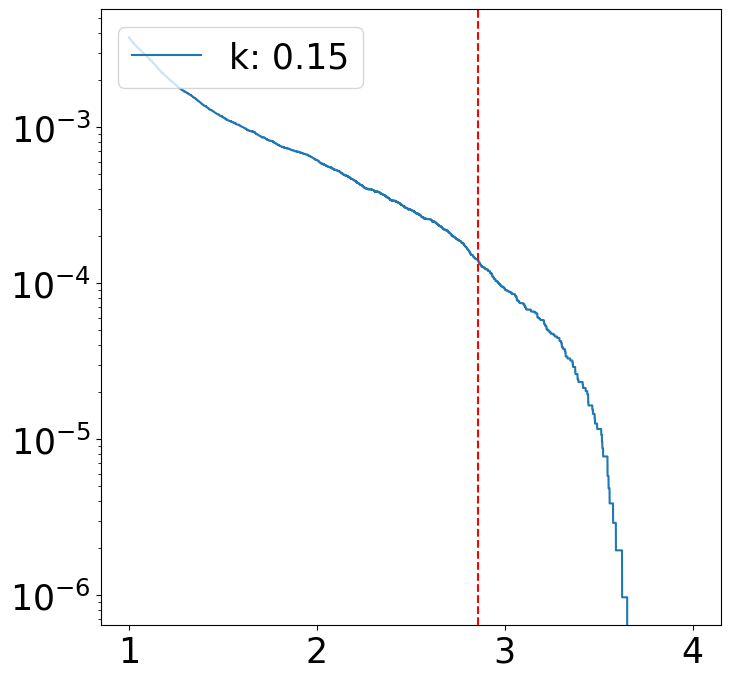

PyObject <matplotlib.legend.Legend object at 0x00000000C25A0370>

In [86]:
fig, ax = subplots(figsize = (8, 8))

ax.set_yscale("log")

ax.plot(sel_, pdf_, label  = "k: 0.15")
ax.axvline(Hs, color ="red", linestyle ="--")
ax.tick_params(labelsize = 25)
ax.legend(loc="upper left", fontsize = 25)

In [87]:
k = 0.16
p = SA[a, b, c, d,
        s, xr, r, I, xv, k1, k2, k]

prob = ODEProblem(HR, condition_k16, tspan, p)
sol16 = solve(prob, AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11, maxiters = 10000000);

In [88]:
ed = int(length(sol16[1,:]) / 4)

x_sum = sol16[1,:][ed:end] + sol16[4,:][ed:end]
    
# index = signal.argrelmax( x_sum )[1]
spikes = x_sum # [x_sum[x] for x in index]
    
Hs = Statistics.mean(spikes) + 6 * Statistics.std(spikes)
counts = spikes[spikes.>=Hs];
length(spikes), Hs

(1132675, 2.104600581730238)

In [89]:
sel_, pdf_ = CALCPDF(spikes)

(1.0:3.000030000300003e-5:4.0, [0.0034511223431257865, 0.0034511223431257865, 0.0034511223431257865, 0.0034511223431257865, 0.0034511223431257865, 0.0034511223431257865, 0.0034511223431257865, 0.0034511223431257865, 0.0034511223431257865, 0.0034511223431257865  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

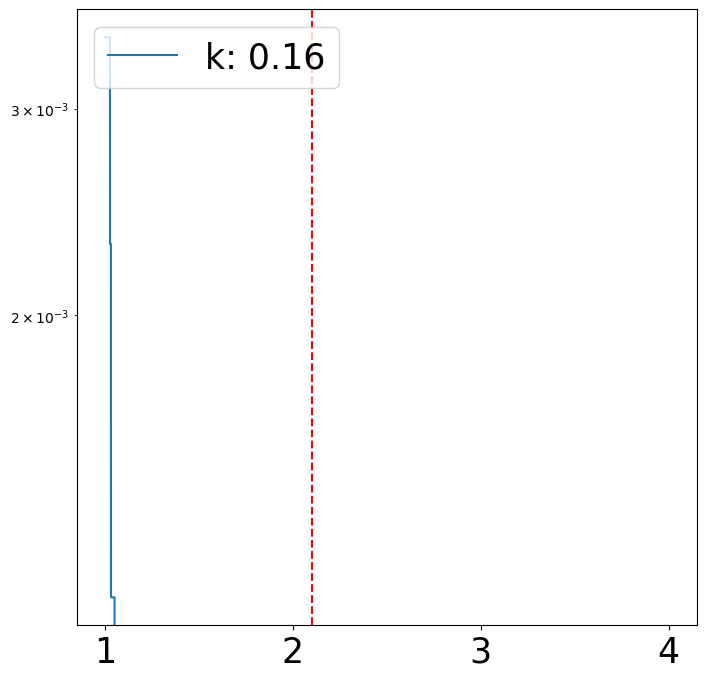

PyObject <matplotlib.legend.Legend object at 0x00000000C4284280>

In [90]:
fig, ax = subplots(figsize = (8, 8))

ax.set_yscale("log")

ax.plot(sel_, pdf_, label  = "k: 0.16")
ax.axvline(Hs, color ="red", linestyle ="--")
ax.tick_params(labelsize = 25)
ax.legend(loc="upper left", fontsize = 25)

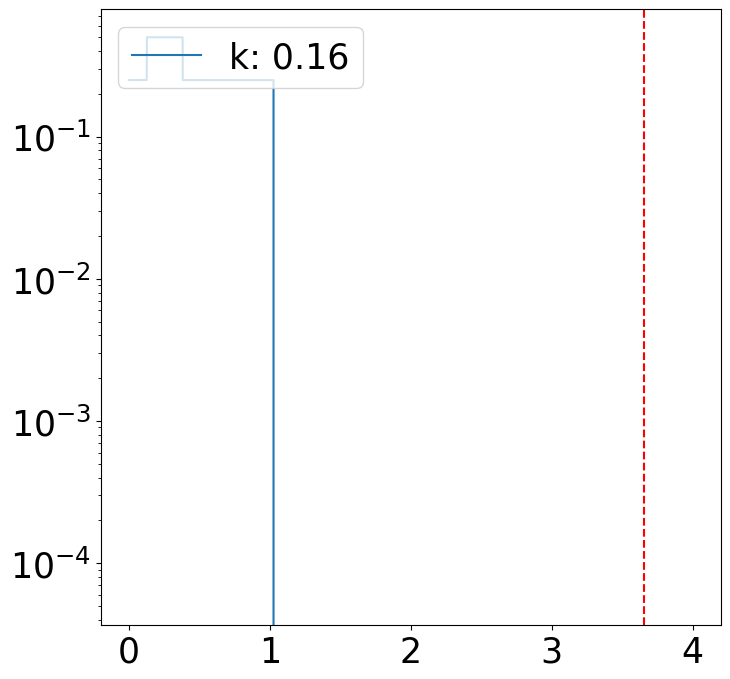

PyObject <matplotlib.legend.Legend object at 0x000000006870AAF0>

In [10]:
x_sum = sol[1,:][ed:end] + sol[4,:][ed:end]
    
index = signal.argrelmax( x_sum )[1]
spikes = [x_sum[x] for x in index]
    
Hs = Statistics.mean(spikes) + 6 * Statistics.std(spikes)
counts = spikes[spikes.>=Hs]

    

    
sel_, pdf_ = CALCPDF(spikes)
    
fig, ax = subplots(figsize = (8, 8))

ax.set_yscale("log")

ax.plot(sel_, pdf_, label  = "k: 0.16")
ax.axvline(Hs, color ="red", linestyle ="--")
ax.tick_params(labelsize = 25)
ax.legend(loc="upper left", fontsize = 25)

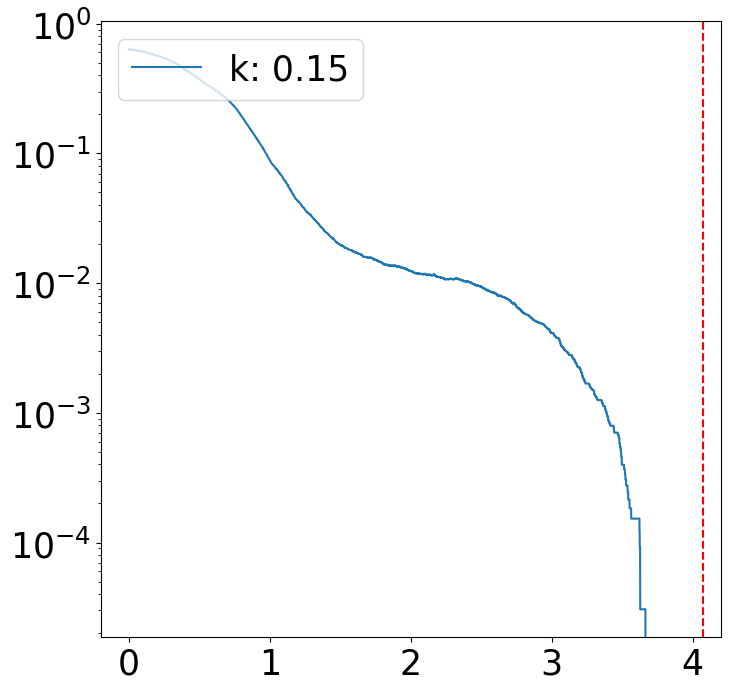

PyObject <matplotlib.legend.Legend object at 0x00000000686B9AC0>

In [10]:
x_sum = sol[1,:][50000:end] + sol[4,:][50000:end]
    
index = signal.argrelmax( x_sum )[1]
spikes = [x_sum[x] for x in index]
    
Hs = Statistics.mean(spikes) + 6 * Statistics.std(spikes)
counts = spikes[spikes.>=Hs]

    

    
sel_, pdf_ = CALCPDF(spikes)
    
fig, ax = subplots(figsize = (8, 8))

ax.set_yscale("log")

ax.plot(sel_, pdf_, label  = "k: 0.15")
ax.axvline(Hs, color ="red", linestyle ="--")
ax.tick_params(labelsize = 25)
ax.legend(loc="upper left", fontsize = 25)

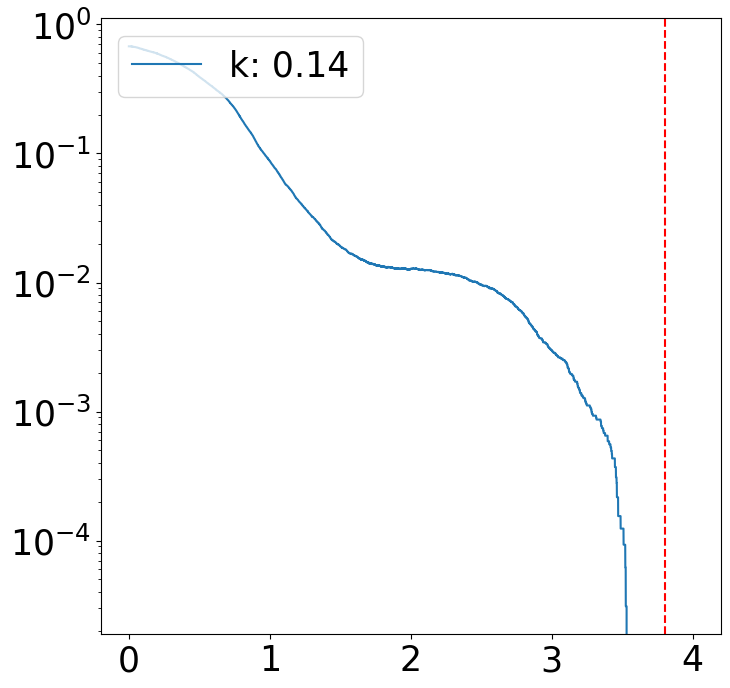

PyObject <matplotlib.legend.Legend object at 0x000000006870AAC0>

In [10]:
x_sum = sol[1,:][50000:end] + sol[4,:][50000:end]
    
index = signal.argrelmax( x_sum )[1]
spikes = [x_sum[x] for x in index]
    
Hs = Statistics.mean(spikes) + 6 * Statistics.std(spikes)
counts = spikes[spikes.>=Hs]

    

    
sel_, pdf_ = CALCPDF(spikes)
    
fig, ax = subplots(figsize = (8, 8))

ax.set_yscale("log")

ax.plot(sel_, pdf_, label  = "k: 0.14")
ax.axvline(Hs, color ="red", linestyle ="--")
ax.tick_params(labelsize = 25)
ax.legend(loc="upper left", fontsize = 25)

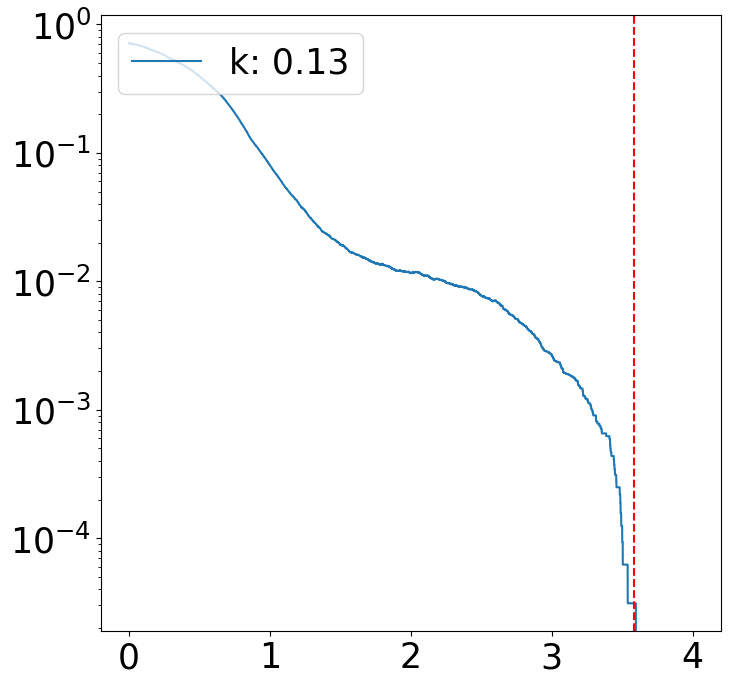

PyObject <matplotlib.legend.Legend object at 0x00000000686FAAC0>

In [10]:
x_sum = sol[1,:][50000:end] + sol[4,:][50000:end]
    
index = signal.argrelmax( x_sum )[1]
spikes = [x_sum[x] for x in index]
    
Hs = Statistics.mean(spikes) + 6 * Statistics.std(spikes)
counts = spikes[spikes.>=Hs]

    

    
sel_, pdf_ = CALCPDF(spikes)
    
fig, ax = subplots(figsize = (8, 8))

ax.set_yscale("log")

ax.plot(sel_, pdf_, label  = "k: 0.13")
ax.axvline(Hs, color ="red", linestyle ="--")
ax.tick_params(labelsize = 25)
ax.legend(loc="upper left", fontsize = 25)

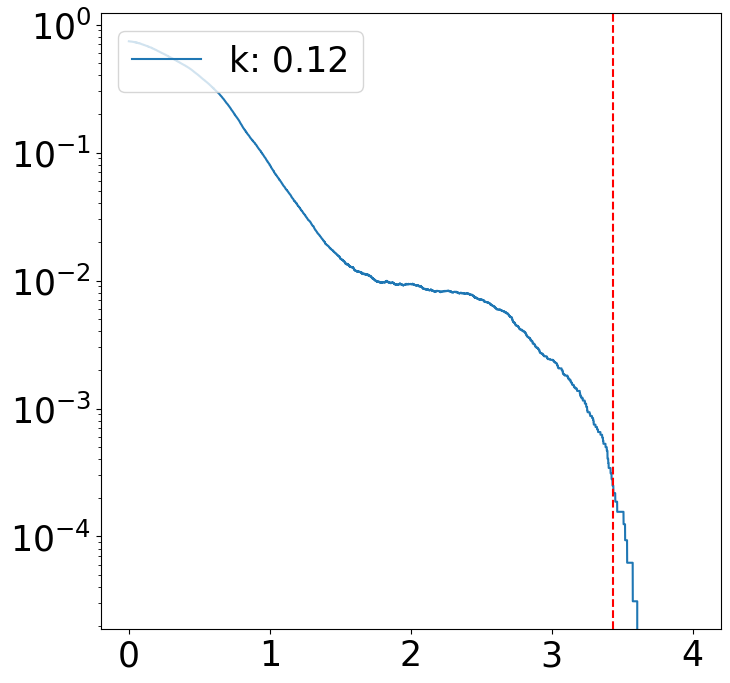

PyObject <matplotlib.legend.Legend object at 0x00000000686E9AF0>

In [10]:
x_sum = sol[1,:][50000:end] + sol[4,:][50000:end]
    
index = signal.argrelmax( x_sum )[1]
spikes = [x_sum[x] for x in index]
    
Hs = Statistics.mean(spikes) + 6 * Statistics.std(spikes)
counts = spikes[spikes.>=Hs]

    

    
sel_, pdf_ = CALCPDF(spikes)
    
fig, ax = subplots(figsize = (8, 8))

ax.set_yscale("log")

ax.plot(sel_, pdf_, label  = "k: 0.12")
ax.axvline(Hs, color ="red", linestyle ="--")
ax.tick_params(labelsize = 25)
ax.legend(loc="upper left", fontsize = 25)

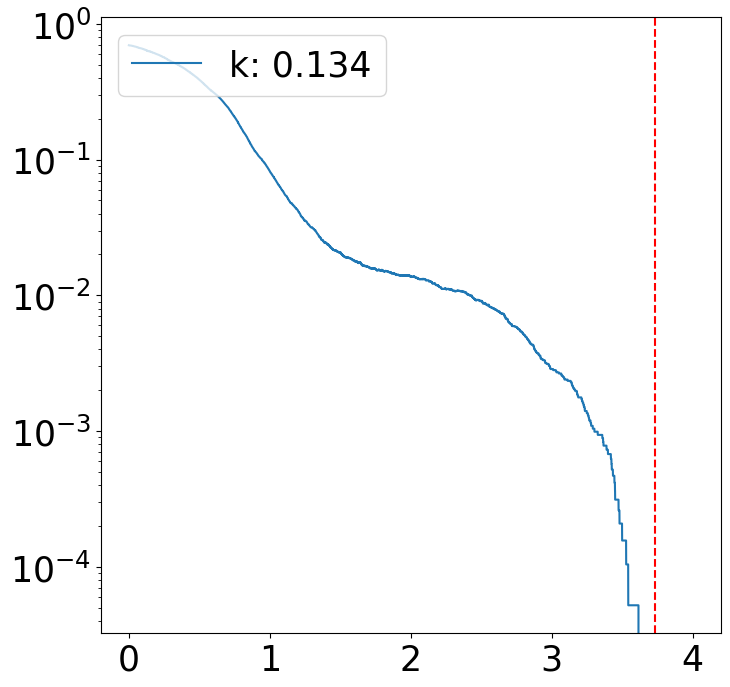

PyObject <matplotlib.legend.Legend object at 0x0000000068507B20>

In [9]:
fig, ax = subplots(figsize = (8, 8))

ax.set_yscale("log")

ax.plot(sel_, pdf_, label  = "k: 0.134")
ax.axvline(Hs, color ="red", linestyle ="--")
ax.tick_params(labelsize = 25)
ax.legend(loc="upper left", fontsize = 25)

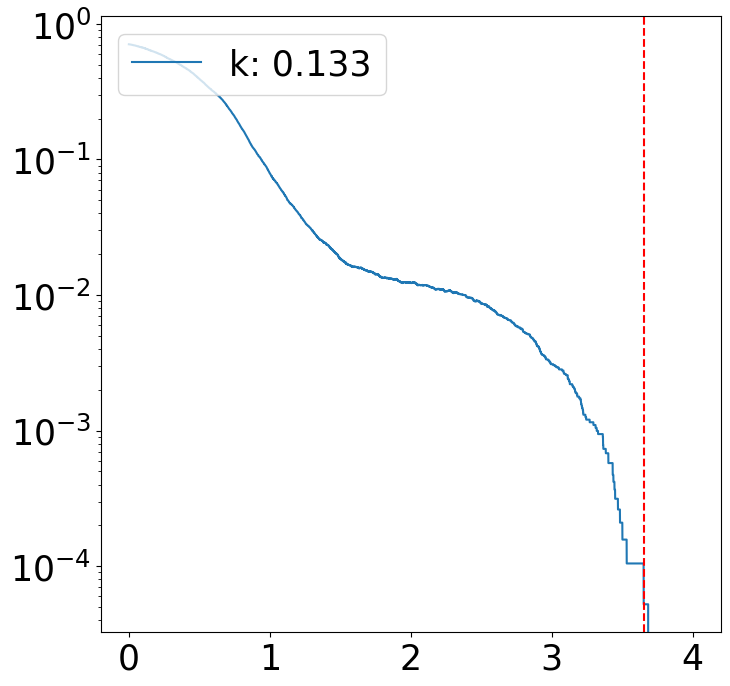

PyObject <matplotlib.legend.Legend object at 0x0000000068507AF0>

In [13]:
fig, ax = subplots(figsize = (8, 8))

ax.set_yscale("log")

ax.plot(sel_, pdf_, label  = "k: 0.133")
ax.axvline(Hs, color ="red", linestyle ="--")
ax.tick_params(labelsize = 25)
ax.legend(loc="upper left", fontsize = 25)

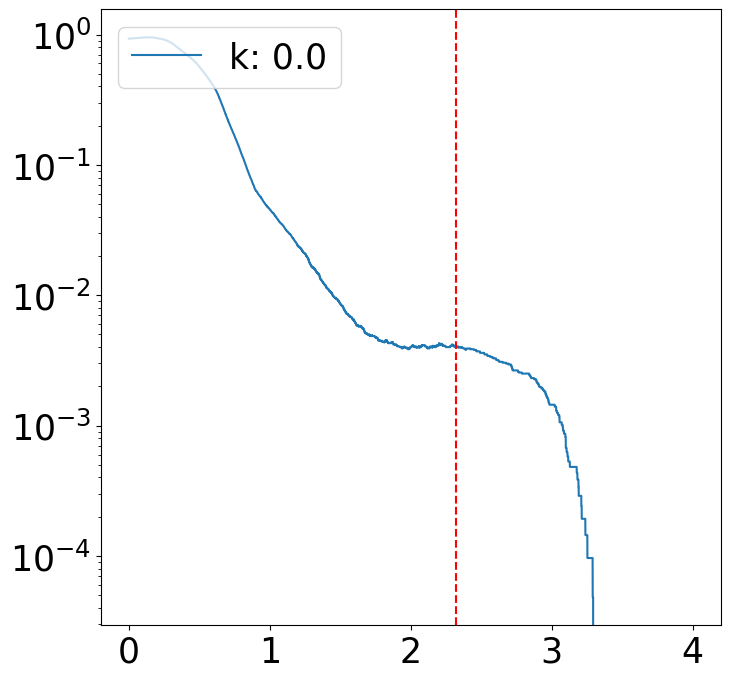

PyObject <matplotlib.legend.Legend object at 0x0000000067238B20>

In [10]:
fig, ax = subplots(figsize = (8, 8))

ax.set_yscale("log")

ax.plot(sel_, pdf_, label  = "k: $k")
ax.axvline(Hs, color ="red", linestyle ="--")
ax.tick_params(labelsize = 25)
ax.legend(loc="upper left", fontsize = 25)

In [5]:
k_space = range(0., 0.2, step = 0.001)


spectrum_array = zeros(3, length(k_space))

int(x) = floor(Int, x)
length(k_space)

201

In [ ]:
for (i, k) in enumerate(k_space)
    if i == 1
        global initialcondition =  [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
        # [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
        # [-0.9160076813527358, -3.865225136766191, 3.268578478929024, -1.1205357248388321, -5.850291104803018, 3.3389018145276816]
    end
    println("Initial condition: $initialcondition"); flush(stdout)
    println("k: $k"); flush(stdout)
    
    p = [a, b, c, d,
        s, xr, r, I, xv, k1, k2, k]
    prob = ODEProblem(HR!, initialcondition, tspan, p)
    sol = solve(prob, AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11, maxiters = 10000000)
   
    ds_HR = ContinuousDynamicalSystem(HR!, initialcondition, p )
    spectrum = lyapunovspectrum(ds_HR, tspan[2]; diffeq = (alg = AutoVern9(Rodas5()),
                                                            abstol = 1e-11, reltol = 1e-11,
                                                            maxiters = 10000000
                                                            ))
    spectrum_array[1:3, i] = spectrum[1:3]
    
    println("Spectrum: ", spectrum_array[1:3, i]); flush(stdout)
    
    initialcondition = sol[length(sol.u)]
    
    println("Last point: ", initialcondition); flush(stdout)
    
    x_sum = sol[1,:][50000:end] + sol[4,:][50000:end]
    
    index = signal.argrelmax( x_sum )[1]
    spikes = [x_sum[x] for x in index]
    Hs = Statistics.mean(spikes) + 6 * Statistics.std(spikes)
    
    sel_, pdf_ = CALCPDF(spikes)
    
    fig, ax = subplots(figsize = (8, 8))

    ax.set_yscale("log")

    ax.plot(sel_, pdf_, label  = "k: $k")
    ax.axvline(Hs, color ="red", linestyle ="--")
    ax.tick_params(labelsize = 25)
    ax.legend(loc="upper left", fontsize = 25)
    
    filename = "$(lpad(i, 5, "0")).png"
    directory = "C:\\Users\\olenin.s\\Desktop\\02small\\pdf\\"
    directory = directory * filename

    fig.savefig(directory)
    
    close()
    
    fig, ax = subplots(figsize = (40, 10))

    ax.plot(x_sum[1:int(length(x_sum) / 4)], lw = 0.5, label  = "k: $k")
    ax.axhline(Hs, color ="red", linestyle ="--")
    ax.tick_params(labelsize = 25)
    ax.legend(loc="upper left", fontsize = 25)
    
    filename = "$(lpad(i, 5, "0")).png"
    directory = "C:\\Users\\olenin.s\\Desktop\\02small\\timeseries\\"
    directory = directory * filename

    fig.savefig(directory)
    
    close()
    
    fig, ax = subplots(figsize = (40, 10))

    ax.scatter(k, spectrum_array[1, i], s = 40, color = "red")
    ax.scatter(k, spectrum_array[2, i], s = 40, color = "green")
    ax.scatter(k, spectrum_array[3, i], s = 40, color = "blue")
    ax.axhline(0, color = "black")
    ax.tick_params(labelsize = 15)
    
    filename = "$(lpad(i, 5, "0")).png"
    directory = "C:\\Users\\olenin.s\\Desktop\\02small\\dots\\"
    directory = directory * filename

    fig.savefig(directory)
    
    close()
    
    fig, ax = subplots(3, 1, figsize = (40, 10))
    ax[1].set_yscale("log")

    ax[1].plot(sel_, pdf_, label  = "k: $k")
    ax[1].axvline(Hs, color ="red", linestyle ="--")
    ax[1].tick_params(labelsize = 15)
    ax[1].legend(loc="upper left", fontsize = 15)
    
    ax[2].plot(x_sum, lw = 0.5, label  = "k: $k") # [1:int(length(x_sum) / 2)]
    ax[2].axhline(Hs, color ="red", linestyle ="--")
    ax[2].tick_params(labelsize = 15)
    
    ax[3].scatter(k, spectrum_array[1, i], s = 40, color = "red")
    ax[3].scatter(k, spectrum_array[2, i], s = 40, color = "green")
    ax[3].scatter(k, spectrum_array[3, i], s = 40, color = "blue")
    ax[3].axhline(0, color = "black")
    ax[3].tick_params(labelsize = 15)

    filename = "$(lpad(i, 5, "0")).png"
    directory = "C:\\Users\\olenin.s\\Desktop\\02small\\full\\"
    directory = directory * filename

    fig.savefig(directory)
    close()
    
    println(">>>>>>>>>>>>>>>")
    println("")
        
end

Initial condition: [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
k: 0.0
Spectrum: [0.01456492581447631, 0.0053351873004175605, -3.6351557504219396e-5]
Last point: [-1.404156523652797, -8.918510057192986, 3.7583636147011488, -0.9400592481778764, -3.3709729955082945, 4.11700058653857]
>>>>>>>>>>>>>>>

Initial condition: [-1.404156523652797, -8.918510057192986, 3.7583636147011488, -0.9400592481778764, -3.3709729955082945, 4.11700058653857]
k: 0.001
Spectrum: [0.01432111523246594, 0.00563222816211132, -4.3629816907097664e-5]
Last point: [-1.0552947779674118, -4.760273229097834, 3.7302494041842933, -0.6987353550945181, -1.9028178363821082, 3.825880699858923]
>>>>>>>>>>>>>>>

Initial condition: [-1.0552947779674118, -4.760273229097834, 3.7302494041842933, -0.6987353550945181, -1.9028178363821082, 3.825880699858923]
k: 0.002
Spectrum: [0.014888578162636308, 0.005728867692534739, -4.055661011212312e-5]
Last point: [-0.8983040301464223, -3.3981133555132095, 3.701303754817509, -1.2036217617590999, -6.0931069

In [ ]:
fig, ax = subplots(figsize = (40, 10))
ax.plot(k_space, spectrum_array[1, 1:end], color = "red")
ax.plot(k_space, spectrum_array[2, 1:end], color = "green")
ax.plot(k_space, spectrum_array[3, 1:end], color = "blue")
ax.axhline(0, color = "black")
ax.tick_params(labelsize = 25)

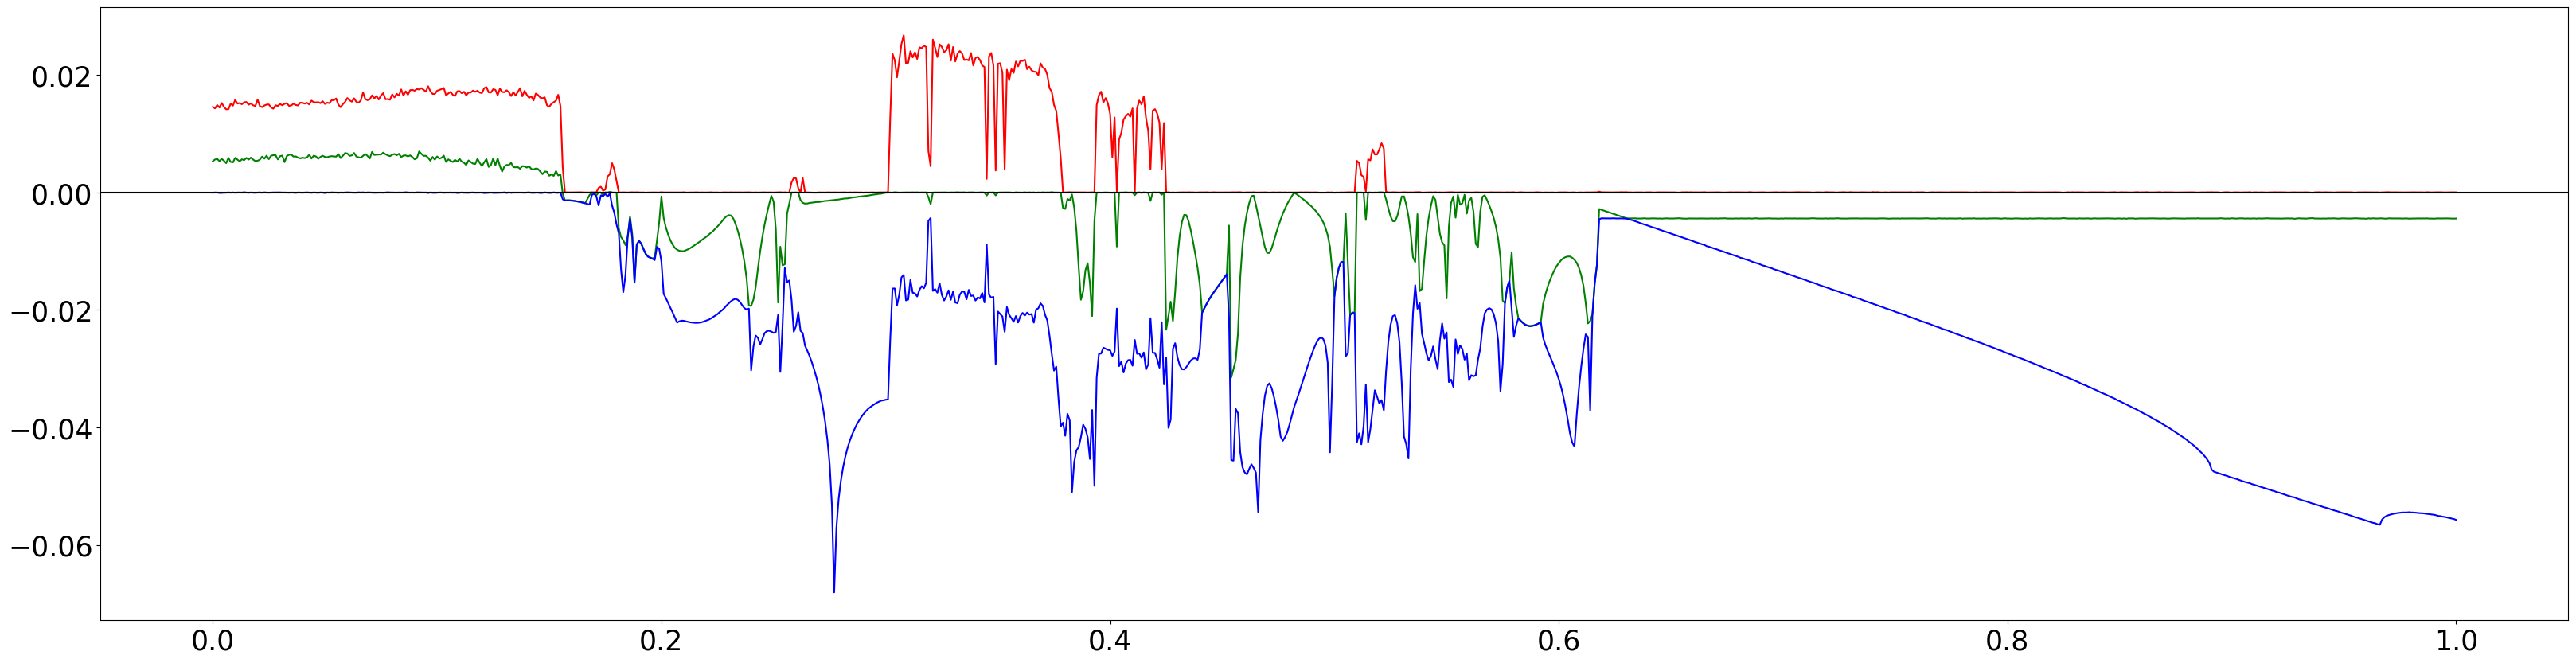

In [23]:
fig, ax = subplots(figsize = (40, 10))
ax.plot(k_space, spectrum_array[1, 1:end], color = "red")
ax.plot(k_space, spectrum_array[2, 1:end], color = "green")
ax.plot(k_space, spectrum_array[3, 1:end], color = "blue")
ax.axhline(0, color = "black")
ax.tick_params(labelsize = 25)

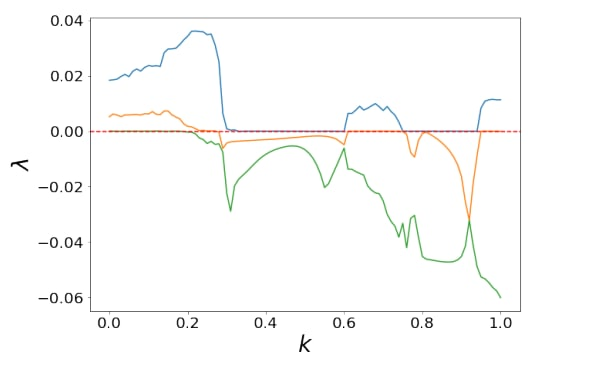

In [169]:
filename = "$(lpad(1, 4, "0")).png"
directory = "C:\\Users\\olenin.s\\Desktop\\res_HR_full_small\\"
directory = directory * filename

"C:\\Users\\olenin.s\\Desktop\\res_HR_full_small\\0001.png"

In [16]:
cd("C:\\Users\\olenin.s\\Desktop\\before02\\timeseries")

In [14]:
pwd()

"C:\\Users\\olenin.s\\Desktop\\before02\\pdf"

In [18]:
pwd()

"C:\\Users\\olenin.s\\Desktop\\before02\\timeseries"

In [19]:
for i in range(1, 1001)
    mv("$i.png", "$(lpad(i, 5, "0")).png")
end

In [6]:
using FFMPEG

"C:\\Users\\olenin.s\\Desktop\\02"

In [9]:
imagesdirectory = pwd()

"C:\\Users\\olenin.s\\Desktop\\02"

In [24]:
framerate = 3
gifname = "\\output.gif"
gifname = imagesdirectory * gifname

"C:\\Users\\olenin.s\\Desktop\\02\\output.gif"

In [3]:
cd("C:\\Users\\olenin.s\\Desktop\\02")

In [ ]:
FFMPEG.ffmpeg_exe(`-framerate $(framerate) -f image2 -i $(imagesdirectory)/%5d.png -y $(gifname)`)

In [25]:
FFMPEG.ffmpeg_exe(`-framerate $(framerate) -f image2 -i $(imagesdirectory)/%5d.png -vf "scale=1200:900" -c:v libx264 -pix_fmt yuv420p -y "C:\\Users\\olenin.s\\Desktop\\02\\output-video.mov"`)

ffmpeg version 4.4 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 8.1.0 (GCC)
  configuration: --enable-cross-compile --cross-prefix=/opt/x86_64-w64-mingw32/bin/x86_64-w64-mingw32- --arch=x86_64 --target-os=mingw64 --cc=cc --cxx=c++ --dep-cc=cc --ar=ar --nm=nm --sysinclude=/workspace/destdir/include --pkg-config=/usr/bin/pkg-config --pkg-config-flags=--static --prefix=/workspace/destdir --sysroot=/opt/x86_64-w64-mingw32/x86_64-w64-mingw32/sys-root --extra-libs=-lpthread --enable-gpl --enable-version3 --enable-nonfree --disable-static --enable-shared --enable-pic --disable-debug --disable-doc --enable-avresample --enable-libass --enable-libfdk-aac --enable-libfreetype --enable-libmp3lame --enable-libopus --enable-libvorbis --enable-libx264 --enable-libx265 --enable-libvpx --enable-encoders --enable-decoders --enable-muxers --enable-demuxers --enable-parsers --enable-openssl --disable-schannel --extra-cflags=-I/workspace/destdir/include --extra-ldflags=-L/workspace/destdi

Process(`'C:\Users\olenin.s\.julia\artifacts\ecb81e6429c089c1da802644fae337754832d534\bin\ffmpeg.exe' -framerate 3 -f image2 -i 'C:\Users\olenin.s\Desktop\02/%5d.png' -vf scale=1200:900 -c:v libx264 -pix_fmt yuv420p -y 'C:\Users\olenin.s\Desktop\02\output-video.mov'`, ProcessExited(0))

In [229]:
filename = "$(lpad(i, 5, "0")).png"
directory = "C:\\Users\\olenin.s\\Desktop\\res_HR_full_small\\"
directory = directory * filename

fig.savefig(directory)

In [8]:
"C:\\Users\\olenin.s\\Desktop\\res_HR_full_small\\" * "$(lpad(1, 4, "0")).png"

"C:\\Users\\olenin.s\\Desktop\\res_HR_full_small\\0001.png"